In [ ]:
# ✅ Install real-time processing and visualization libraries
!pip install pathway bokeh


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 5.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of boto3 to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.6/777.6 kB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.6/244.6 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.1/319.1 kB 

In [ ]:

from google.colab import files
files.upload()


Saving dataset (1).csv to dataset (1).csv


{'dataset (1).csv': b'ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime\r\n0,BHMBCCMKT01,577,26.14453614,91.73617216,61,car,low,1,0,04-10-2016,07:59:00\r\n1,BHMBCCMKT01,577,26.14453614,91.73617216,64,car,low,1,0,04-10-2016,08:25:00\r\n2,BHMBCCMKT01,577,26.14453614,91.73617216,80,car,low,2,0,04-10-2016,08:59:00\r\n3,BHMBCCMKT01,577,26.14453614,91.73617216,107,car,low,2,0,04-10-2016,09:32:00\r\n4,BHMBCCMKT01,577,26.14453614,91.73617216,150,bike,low,2,0,04-10-2016,09:59:00\r\n5,BHMBCCMKT01,577,26.14453614,91.73617216,177,car,low,3,0,04-10-2016,10:26:00\r\n6,BHMBCCMKT01,577,26.14453614,91.73617216,219,truck,high,6,0,04-10-2016,10:59:00\r\n7,BHMBCCMKT01,577,26.14453614,91.73617216,247,car,average,5,0,04-10-2016,11:25:00\r\n8,BHMBCCMKT01,577,26.14453614,91.73617216,259,cycle,average,5,0,04-10-2016,11:59:00\r\n9,BHMBCCMKT01,577,26.14453614,91.73617216,266,bike,high,8,0,04-10-2016,12:29:00\r\n10

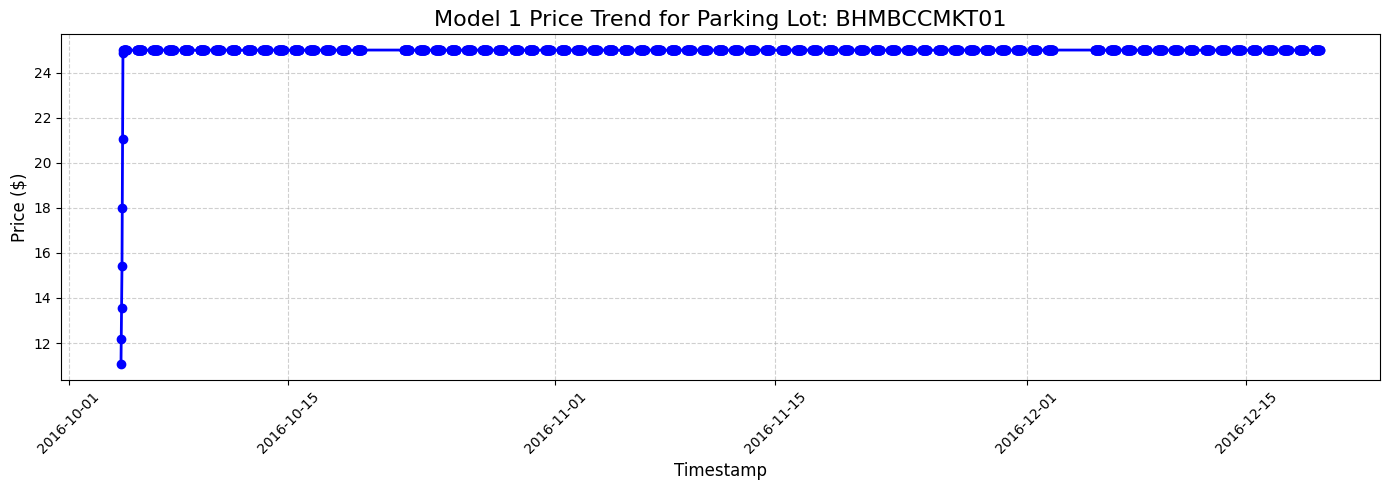

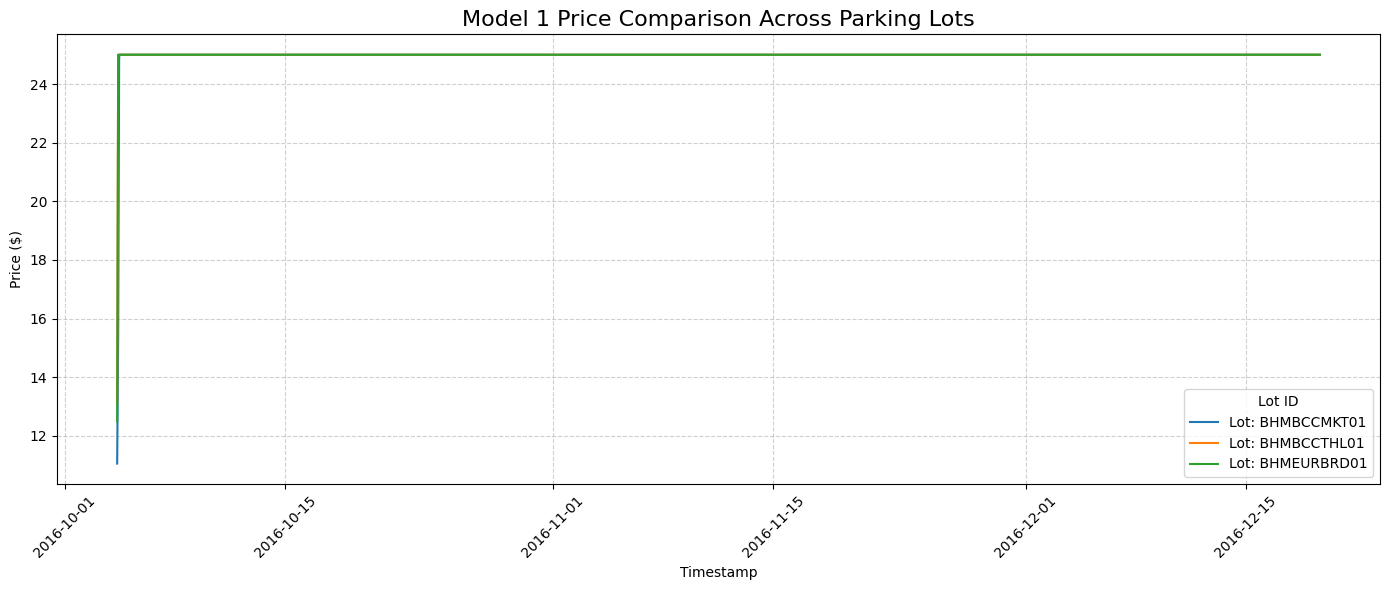

In [ ]:
#Model 1: Baseline Linear Model

#  STEP 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#
csv_path = "/kaggle/input/final-project/dataset (1).csv"
df = pd.read_csv("/kaggle/input/final-project/dataset (1).csv")

#  STEP 3: Preprocess Timestamps
df["Timestamp"] = pd.to_datetime(
    df["LastUpdatedDate"] + " " + df["LastUpdatedTime"],
    errors="coerce",     # Avoids crashing if format mismatch
    dayfirst=True        # Your format is DD-MM-YYYY
)


#  STEP 4: Calculate Occupancy Rate
df["OccupancyRate"] = df["Occupancy"] / df["Capacity"]

# STEP 5: Apply Model 1 Pricing Logic
BASE_PRICE = 10.0
ALPHA = 10

# Initialize
df["Model1_Price"] = BASE_PRICE
current_prices = {lot: BASE_PRICE for lot in df["SystemCodeNumber"].unique()}

# Update prices over time for each lot
for lot_id in df["SystemCodeNumber"].unique():
    lot_data = df[df["SystemCodeNumber"] == lot_id]
    prev_price = BASE_PRICE
    for idx in lot_data.index:
        occ_rate = df.loc[idx, "OccupancyRate"]
        new_price = prev_price + ALPHA * occ_rate
        new_price = max(5, min(25, new_price))  # Bound the price
        df.at[idx, "Model1_Price"] = new_price
        prev_price = new_price

#  STEP 6: Preview Result
df[["SystemCodeNumber", "Timestamp", "Occupancy", "Capacity", "OccupancyRate", "Model1_Price"]].head()
#  Visualize for One Lot
lot_id = df["SystemCodeNumber"].unique()[0]  # Pick any ID you want
lot_data = df[df["SystemCodeNumber"] == lot_id].sort_values("Timestamp")

# Plot
plt.figure(figsize=(14, 5))
plt.plot(lot_data["Timestamp"], lot_data["Model1_Price"], marker='o', color='blue', linewidth=2)

# 📊 Presentation Tweaks
plt.title(f"Model 1 Price Trend for Parking Lot: {lot_id}", fontsize=16)
plt.xlabel("Timestamp", fontsize=12)
plt.ylabel("Price ($)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
#  Visualize for First 3 Parking Lots
plt.figure(figsize=(14, 6))

for lot_id in df["SystemCodeNumber"].unique()[:3]:
    lot_data = df[df["SystemCodeNumber"] == lot_id].sort_values("Timestamp")
    plt.plot(lot_data["Timestamp"], lot_data["Model1_Price"], label=f"Lot: {lot_id}")

plt.title("Model 1 Price Comparison Across Parking Lots", fontsize=16)
plt.xlabel("Timestamp")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.legend(title="Lot ID")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)


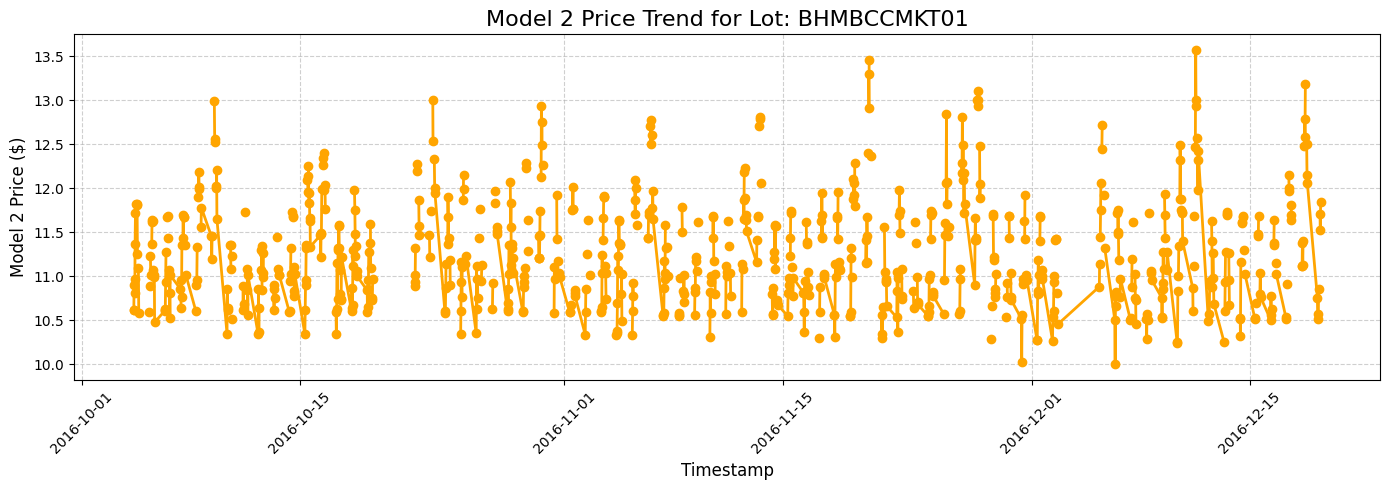

In [ ]:

#  Model 2: Demand-Based Pricing (Final Fixed Version)

#  Step 1: Make sure Model 1 has run and 'result_df' is valid
try:
    result_df = result_df.copy()
except:
    result_df = df.copy()  # fallback to original data

# Step 2: Clean column names only if DataFrame is valid
if result_df is not None:
    result_df.columns = result_df.columns.str.strip()
else:
    raise ValueError("result_df is None — make sure Model 1 runs before Model 2")

#  Step 3: Encode categorical features
def encode_features(df):
    required_cols = ['TrafficConditionNearby', 'VehicleType']
    for col in required_cols:
        if col not in df.columns:
            raise KeyError(f"❌ Missing required column: '{col}'")

    # Traffic mapping
    traffic_map = {'low': 0, 'medium': 1, 'high': 2}
    df['TrafficEncoded'] = df['TrafficConditionNearby'].map(traffic_map)

    # Vehicle type mapping
    vehicle_map = {'bike': 0.5, 'car': 1.0, 'truck': 1.5}
    df['VehicleWeight'] = df['VehicleType'].map(vehicle_map)

    return df

# Step 4: Compute Demand Score
def compute_demand_score(df, weights):
    α, β, γ, δ, ε = weights

    df['OccupancyRate'] = df['Occupancy'] / df['Capacity']

    df['DemandScore'] = (
        α * df['OccupancyRate'] +
        β * df['QueueLength'] -
        γ * df['TrafficEncoded'] +
        δ * df['IsSpecialDay'] +
        ε * df['VehicleWeight']
    )

    return df

#  Step 5: Normalize demand to [0, 1]
def normalize_demand(df):
    min_d = df['DemandScore'].min()
    max_d = df['DemandScore'].max()

    if max_d == min_d:
        df['NormalizedDemand'] = 0
    else:
        df['NormalizedDemand'] = (df['DemandScore'] - min_d) / (max_d - min_d)

    return df

#  Step 6: Apply final pricing formula
def apply_model2_price(df, base_price=10.0, λ=0.5):
    df['Model2_Price'] = base_price * (1 + λ * df['NormalizedDemand'])

    # Limit prices between $5 and $20
    df['Model2_Price'] = df['Model2_Price'].clip(lower=base_price * 0.5, upper=base_price * 2)

    return df

# Step 7: Run full Model 2 pipeline
weights = (1.0, 0.2, 0.3, 0.5, 0.4)  # (α, β, γ, δ, ε)

result_df = encode_features(result_df)
result_df = compute_demand_score(result_df, weights)
result_df = normalize_demand(result_df)
result_df = apply_model2_price(result_df)

# Step 8: Preview output
result_df[['SystemCodeNumber', 'Timestamp', 'OccupancyRate', 'QueueLength',
           'TrafficEncoded', 'IsSpecialDay', 'VehicleWeight',
           'DemandScore', 'NormalizedDemand', 'Model2_Price']].head()
import matplotlib.pyplot as plt


lot_id = result_df['SystemCodeNumber'].unique()[0]

# Filter data for that lot and sort by time
lot_data = result_df[result_df['SystemCodeNumber'] == lot_id].sort_values('Timestamp')

# Plot Model 2 pricing
plt.figure(figsize=(14, 5))
plt.plot(lot_data['Timestamp'], lot_data['Model2_Price'], marker='o', color='orange', linewidth=2)

# Enhancements
plt.title(f'Model 2 Price Trend for Lot: {lot_id}', fontsize=16)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Model 2 Price ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


/tmp/ipykernel_35/2250416231.py:18: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


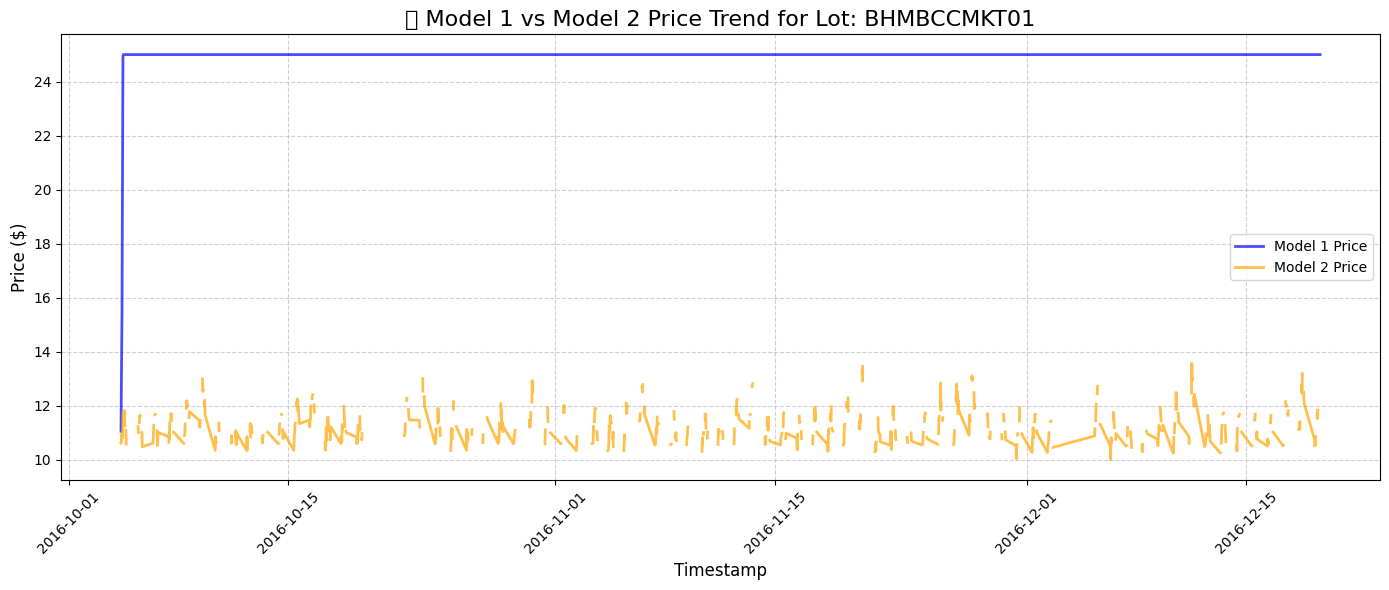

In [ ]:
import matplotlib.pyplot as plt

# Filter data for one parking lot
lot_id = result_df['SystemCodeNumber'].unique()[0]  # Pick any one lot
lot_data = result_df[result_df['SystemCodeNumber'] == lot_id].sort_values("Timestamp")

# Plot both Model 1 and Model 2 prices
plt.figure(figsize=(14, 6))
plt.plot(lot_data['Timestamp'], lot_data['Model1_Price'], label='Model 1 Price', color='blue', linewidth=2, alpha=0.7)
plt.plot(lot_data['Timestamp'], lot_data['Model2_Price'], label='Model 2 Price', color='orange', linewidth=2, alpha=0.7)

plt.title(f'📈 Model 1 vs Model 2 Price Trend for Lot: {lot_id}', fontsize=16)
plt.xlabel("Timestamp", fontsize=12)
plt.ylabel("Price ($)", fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
from geopy.distance import geodesic

#  Function to calculate distance (in km) between two lat/lon points
def calculate_distance(lat1, lon1, lat2, lon2):
    return geodesic((lat1, lon1), (lat2, lon2)).km

# Function to apply competitive pricing
def apply_model3_price(df, radius_km=1.0, base_price=10.0, λ=0.4):
    df = df.copy()
    df['Model3_Price'] = df['Model2_Price']  # Start with Model2 as base

    lot_ids = df['SystemCodeNumber'].unique()

    for lot_id in lot_ids:
        lot_data = df[df['SystemCodeNumber'] == lot_id].sort_values("Timestamp")

        # Get lat/lon of current lot
        lat1 = lot_data['Latitude'].iloc[0]
        lon1 = lot_data['Longitude'].iloc[0]

        # Find nearby lots
        nearby_ids = []
        for other_id in lot_ids:
            if other_id == lot_id:
                continue
            other_data = df[df['SystemCodeNumber'] == other_id]
            lat2 = other_data['Latitude'].iloc[0]
            lon2 = other_data['Longitude'].iloc[0]
            distance = calculate_distance(lat1, lon1, lat2, lon2)
            if distance <= radius_km:
                nearby_ids.append(other_id)

        # Applying pricing logic per row
        updated_prices = []
        for idx, row in lot_data.iterrows():
            base_model2_price = row['Model2_Price']
            occupancy = row['Occupancy']
            capacity = row['Capacity']

            # Looking at nearby lots at the same timestamp
            nearby_rows = df[
                (df['SystemCodeNumber'].isin(nearby_ids)) &
                (df['Timestamp'] == row['Timestamp'])
            ]

            if not nearby_rows.empty:
                avg_price = nearby_rows['Model2_Price'].mean()
                avg_occupancy = (nearby_rows['Occupancy'] / nearby_rows['Capacity']).mean()
            else:
                avg_price = base_model2_price
                avg_occupancy = occupancy / capacity if capacity > 0 else 0

            delta = (avg_price - base_model2_price) + (avg_occupancy - (occupancy / capacity))
            new_price = base_model2_price + λ * delta
            new_price = max(5, min(25, new_price))  # Bound the price

            updated_prices.append(new_price)

        df.loc[lot_data.index, 'Model3_Price'] = updated_prices

    return df
    # Apply Model 3
result_df = apply_model3_price(result_df)

# Preview
result_df[['SystemCodeNumber', 'Timestamp', 'Latitude', 'Longitude', 'Model1_Price', 'Model2_Price', 'Model3_Price']].head()



SystemCodeNumber           Timestamp   Latitude  Longitude  Model1_Price  \
0      BHMBCCMKT01 2016-10-04 07:59:00  26.144536  91.736172     11.057192   
1      BHMBCCMKT01 2016-10-04 08:25:00  26.144536  91.736172     12.166378   
2      BHMBCCMKT01 2016-10-04 08:59:00  26.144536  91.736172     13.552860   
3      BHMBCCMKT01 2016-10-04 09:32:00  26.144536  91.736172     15.407279   
4      BHMBCCMKT01 2016-10-04 09:59:00  26.144536  91.736172     18.006932   

   Model2_Price  Model3_Price  
0     10.612925     10.828429  
1     10.619473     10.924238  
2     10.906291     11.168801  
3     10.965226     11.277969  
4     10.807193     11.278070

/tmp/ipykernel_35/3789179051.py:20: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


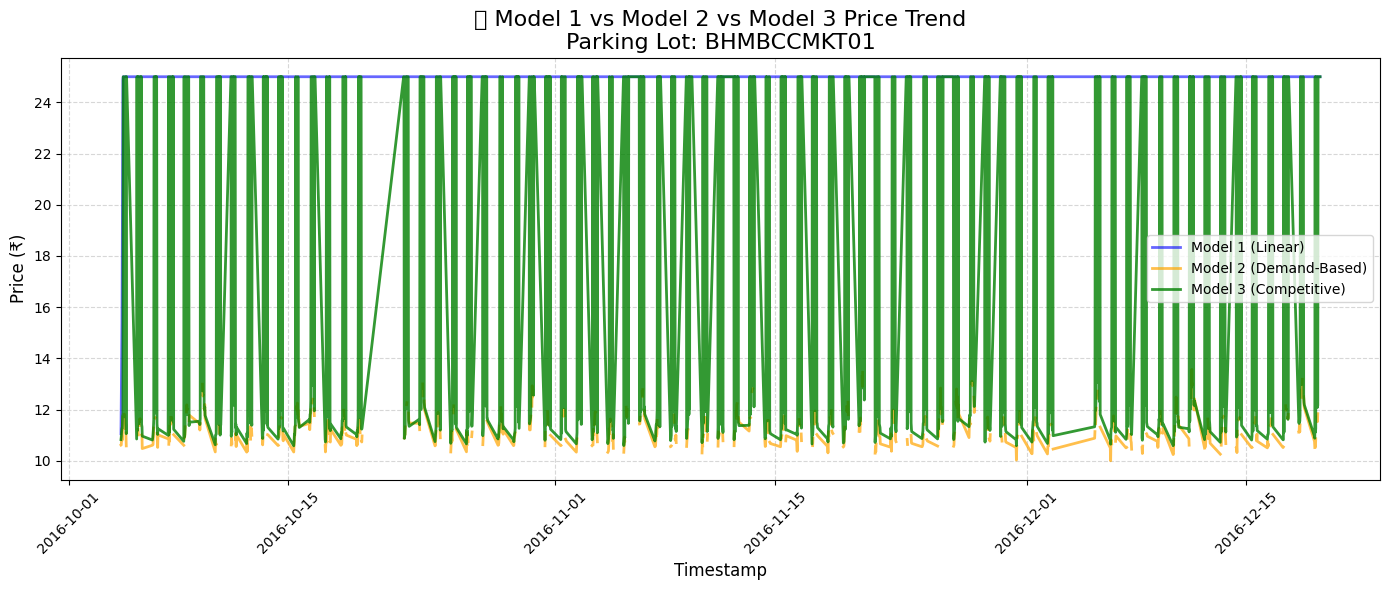

In [ ]:
import matplotlib.pyplot as plt

# Choose one lot to visualize
lot_id = result_df['SystemCodeNumber'].unique()[0]
lot_data = result_df[result_df['SystemCodeNumber'] == lot_id].sort_values('Timestamp')

# Ploting all three model prices
plt.figure(figsize=(14, 6))
plt.plot(lot_data['Timestamp'], lot_data['Model1_Price'], label="Model 1 (Linear)", color='blue', linewidth=2, alpha=0.6)
plt.plot(lot_data['Timestamp'], lot_data['Model2_Price'], label="Model 2 (Demand-Based)", color='orange', linewidth=2, alpha=0.7)
plt.plot(lot_data['Timestamp'], lot_data['Model3_Price'], label="Model 3 (Competitive)", color='green', linewidth=2, alpha=0.8)

# Presentation tweaks
plt.title(f"📈 Model 1 vs Model 2 vs Model 3 Price Trend\nParking Lot: {lot_id}", fontsize=16)
plt.xlabel("Timestamp", fontsize=12)
plt.ylabel("Price (₹)", fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:

!pip install pathway
import pathway as pw

class ParkingSchema1(pw.Schema):
    SystemCodeNumber: str
    Occupancy: int
    Capacity: int
    LastUpdatedDate: str
    LastUpdatedTime: str

input_table = pw.io.csv.read(
    "final-project.csv",
    schema=ParkingSchema1,
    mode="streaming",
    autocommit_duration_ms=1000
)

@pw.udf
def make_timestamp(date: str, time: str) -> str:
    return f"{date} {time}"

@pw.udf
def model1_price(occupancy: int, capacity: int) -> float:
    base_price = 10.0
    alpha = 10.0
    if capacity == 0:
        return base_price
    price = base_price + alpha * (occupancy / capacity)
    return max(5, min(25, price))

result = input_table.select(
    SystemCodeNumber=input_table.SystemCodeNumber,
    Timestamp=make_timestamp(input_table.LastUpdatedDate, input_table.LastUpdatedTime),
    Model1_Price=model1_price(input_table.Occupancy, input_table.Capacity)
)

pw.io.jsonlines.write(result, filename="model1_output_stream.jsonl")
pw.run()





In [ ]:
import pathway as pw

# Step 1: Define corrected schema
class ParkingSchema(pw.Schema):
    SystemCodeNumber: str
    Capacity: int
    Occupancy: int
    QueueLength: int
    VehicleType: str
    TrafficConditionNearby: str
    IsSpecialDay: int
    LastUpdatedDate: str
    LastUpdatedTime: str

# Step 2: Read CSV
input_table = pw.io.csv.read(
    "final-project.csv",
    schema=ParkingSchema,
    mode="streaming",
    autocommit_duration_ms=1000
)

# Step 3: Combine Date and Time → Timestamp
@pw.udf
def make_timestamp(date: str, time: str) -> str:
    return f"{date} {time}"

# Step 4: Pricing model
@pw.udf
def model2_price(
    occupancy: int,
    capacity: int,
    queue: int,
    traffic: str,
    is_special: int,
    vehicle_type: str
) -> float:
    base_price = 10.0
    λ = 0.5
    α, β, γ, δ, ε = 1.0, 0.2, 0.3, 0.5, 0.4

    traffic_map = {"low": 0, "medium": 1, "average": 1, "high": 2}
    vehicle_map = {"bike": 0.5, "car": 1.0, "truck": 1.5, "cycle": 0.3}

    traffic_level = traffic_map.get(traffic.lower(), 1)
    vehicle_weight = vehicle_map.get(vehicle_type.lower(), 1.0)

    if capacity == 0:
        return base_price

    occ_rate = occupancy / capacity
    demand = (
        α * occ_rate +
        β * queue -
        γ * traffic_level +
        δ * is_special +
        ε * vehicle_weight
    )

    demand = max(0, min(demand / 5, 1))
    price = base_price * (1 + λ * demand)
    return max(5, min(25, price))

# Step 5: Adding pricing logic + output timestamp
result = input_table.select(
    SystemCodeNumber=input_table.SystemCodeNumber,
    Timestamp=make_timestamp(input_table.LastUpdatedDate, input_table.LastUpdatedTime),
    Model2_Price=model2_price(
        input_table.Occupancy,
        input_table.Capacity,
        input_table.QueueLength,
        input_table.TrafficConditionNearby,
        input_table.IsSpecialDay,
        input_table.VehicleType
    )
)

# Step 6: Write output
pw.io.jsonlines.write(result, filename="model2_output_stream.jsonl")
pw.run()


PATHWAY PROGRESS DASHBOARD                                             
                                                                                                                   
                         no.                                           latency                                     
                    messages                                           to wall     lag to                          
                      in the                                             clock      input      total    current    
                        last   in the last        since    operator       [ms]       [ms]       rows       rows    
    connector      minibatch        minute        start   ──────────────────────────────────────────────────────   
   ─────────────────────────────────────────────────────   input           342                                     
    FileSystem…            0             0            0    output          342          0                          
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0     Above you can see the latency of input and output      
    FileSystem…     finished             0            0    operators. The latency is measured as the difference    
    FileSystem…     finished             0            0   between the time when the operator processed the data    
    FileSystem…     finished             0            0        and the time when pathway acquired the data.        
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0         18368        18368                                                            
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                    

PATHWAY PROGRESS DASHBOARD                                             
                                                                                                                   
                         no.                                           latency                                     
                    messages                                           to wall     lag to                          
                      in the                                             clock      input      total    current    
                        last   in the last        since    operator       [ms]       [ms]       rows       rows    
    connector      minibatch        minute        start   ──────────────────────────────────────────────────────   
   ─────────────────────────────────────────────────────   input           742                                     
    FileSystem…            0             0            0    output          742          0                          
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0     Above you can see the latency of input and output      
    FileSystem…     finished             0            0    operators. The latency is measured as the difference    
    FileSystem…     finished             0            0   between the time when the operator processed the data    
    FileSystem…     finished             0            0        and the time when pathway acquired the data.        
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0         18368        18368                                                            
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                    

PATHWAY PROGRESS DASHBOARD                                             
                                                                                                                   
                         no.                                           latency                                     
                    messages                                           to wall     lag to                          
                      in the                                             clock      input      total    current    
                        last   in the last        since    operator       [ms]       [ms]       rows       rows    
    connector      minibatch        minute        start   ──────────────────────────────────────────────────────   
   ─────────────────────────────────────────────────────   input           942                                     
    FileSystem…            0             0            0    output          942          0                          
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0     Above you can see the latency of input and output      
    FileSystem…     finished             0            0    operators. The latency is measured as the difference    
    FileSystem…     finished             0            0   between the time when the operator processed the data    
    FileSystem…     finished             0            0        and the time when pathway acquired the data.        
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0         18368        18368                                                            
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                    

PATHWAY PROGRESS DASHBOARD                                             
                                                                                                                   
                         no.                                           latency                                     
                    messages                                           to wall     lag to                          
                      in the                                             clock      input      total    current    
                        last   in the last        since    operator       [ms]       [ms]       rows       rows    
    connector      minibatch        minute        start   ──────────────────────────────────────────────────────   
   ─────────────────────────────────────────────────────   input           348                                     
    FileSystem…            0             0            0    output          348          0                          
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0     Above you can see the latency of input and output      
    FileSystem…     finished             0            0    operators. The latency is measured as the difference    
    FileSystem…     finished             0            0   between the time when the operator processed the data    
    FileSystem…     finished             0            0        and the time when pathway acquired the data.        
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0         18368        18368                                                            
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                    

PATHWAY PROGRESS DASHBOARD                                             
                                                                                                                   
                         no.                                           latency                                     
                    messages                                           to wall     lag to                          
                      in the                                             clock      input      total    current    
                        last   in the last        since    operator       [ms]       [ms]       rows       rows    
    connector      minibatch        minute        start   ──────────────────────────────────────────────────────   
   ─────────────────────────────────────────────────────   input           748                                     
    FileSystem…            0             0            0    output          748          0                          
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0     Above you can see the latency of input and output      
    FileSystem…     finished             0            0    operators. The latency is measured as the difference    
    FileSystem…     finished             0            0   between the time when the operator processed the data    
    FileSystem…     finished             0            0        and the time when pathway acquired the data.        
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0         18368        18368                                                            
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                    

PATHWAY PROGRESS DASHBOARD                                             
                                                                                                                   
                         no.                                           latency                                     
                    messages                                           to wall     lag to                          
                      in the                                             clock      input      total    current    
                        last   in the last        since    operator       [ms]       [ms]       rows       rows    
    connector      minibatch        minute        start   ──────────────────────────────────────────────────────   
   ─────────────────────────────────────────────────────   input           948                                     
    FileSystem…            0             0            0    output          948          0                          
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0     Above you can see the latency of input and output      
    FileSystem…     finished             0            0    operators. The latency is measured as the difference    
    FileSystem…     finished             0            0   between the time when the operator processed the data    
    FileSystem…     finished             0            0        and the time when pathway acquired the data.        
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0         18368        18368                                                            
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                    

PATHWAY PROGRESS DASHBOARD                                             
                                                                                                                   
                         no.                                           latency                                     
                    messages                                           to wall     lag to                          
                      in the                                             clock      input      total    current    
                        last   in the last        since    operator       [ms]       [ms]       rows       rows    
    connector      minibatch        minute        start   ──────────────────────────────────────────────────────   
   ─────────────────────────────────────────────────────   input           349                                     
    FileSystem…            0             0            0    output          349          0                          
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0     Above you can see the latency of input and output      
    FileSystem…     finished             0            0    operators. The latency is measured as the difference    
    FileSystem…     finished             0            0   between the time when the operator processed the data    
    FileSystem…     finished             0            0        and the time when pathway acquired the data.        
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0         18368        18368                                                            
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                    

PATHWAY PROGRESS DASHBOARD                                             
                                                                                                                   
                         no.                                           latency                                     
                    messages                                           to wall     lag to                          
                      in the                                             clock      input      total    current    
                        last   in the last        since    operator       [ms]       [ms]       rows       rows    
    connector      minibatch        minute        start   ──────────────────────────────────────────────────────   
   ─────────────────────────────────────────────────────   input           549                                     
    FileSystem…            0             0            0    output          549          0                          
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0     Above you can see the latency of input and output      
    FileSystem…     finished             0            0    operators. The latency is measured as the difference    
    FileSystem…     finished             0            0   between the time when the operator processed the data    
    FileSystem…     finished             0            0        and the time when pathway acquired the data.        
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0         18368        18368                                                            
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                    

PATHWAY PROGRESS DASHBOARD                                             
                                                                                                                   
                         no.                                           latency                                     
                    messages                                           to wall     lag to                          
                      in the                                             clock      input      total    current    
                        last   in the last        since    operator       [ms]       [ms]       rows       rows    
    connector      minibatch        minute        start   ──────────────────────────────────────────────────────   
   ─────────────────────────────────────────────────────   input           955                                     
    FileSystem…            0             0            0    output          955          0                          
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0     Above you can see the latency of input and output      
    FileSystem…     finished             0            0    operators. The latency is measured as the difference    
    FileSystem…     finished             0            0   between the time when the operator processed the data    
    FileSystem…     finished             0            0        and the time when pathway acquired the data.        
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0         18368        18368                                                            
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                    

PATHWAY PROGRESS DASHBOARD                                             
                                                                                                                   
                         no.                                           latency                                     
                    messages                                           to wall     lag to                          
                      in the                                             clock      input      total    current    
                        last   in the last        since    operator       [ms]       [ms]       rows       rows    
    connector      minibatch        minute        start   ──────────────────────────────────────────────────────   
   ─────────────────────────────────────────────────────   input           985                                     
    FileSystem…            0             0            0    output          985          0                          
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0     Above you can see the latency of input and output      
    FileSystem…     finished             0            0    operators. The latency is measured as the difference    
    FileSystem…     finished             0            0   between the time when the operator processed the data    
    FileSystem…     finished             0            0        and the time when pathway acquired the data.        
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0         18368        18368                                                            
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                    

PATHWAY PROGRESS DASHBOARD                                             
                                                                                                                   
                         no.                                           latency                                     
                    messages                                           to wall     lag to                          
                      in the                                             clock      input      total    current    
                        last   in the last        since    operator       [ms]       [ms]       rows       rows    
    connector      minibatch        minute        start   ──────────────────────────────────────────────────────   
   ─────────────────────────────────────────────────────   input           560                                     
    FileSystem…            0             0            0    output          560          0                          
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0     Above you can see the latency of input and output      
    FileSystem…     finished             0            0    operators. The latency is measured as the difference    
    FileSystem…     finished             0            0   between the time when the operator processed the data    
    FileSystem…     finished             0            0        and the time when pathway acquired the data.        
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0         18368        18368                                                            
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                    

PATHWAY PROGRESS DASHBOARD                                             
                                                                                                                   
                         no.                                           latency                                     
                    messages                                           to wall     lag to                          
                      in the                                             clock      input      total    current    
                        last   in the last        since    operator       [ms]       [ms]       rows       rows    
    connector      minibatch        minute        start   ──────────────────────────────────────────────────────   
   ─────────────────────────────────────────────────────   input           760                                     
    FileSystem…            0             0            0    output          760          0                          
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0     Above you can see the latency of input and output      
    FileSystem…     finished             0            0    operators. The latency is measured as the difference    
    FileSystem…     finished             0            0   between the time when the operator processed the data    
    FileSystem…     finished             0            0        and the time when pathway acquired the data.        
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0         18368        18368                                                            
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                    

PATHWAY PROGRESS DASHBOARD                                             
                                                                                                                   
                         no.                                           latency                                     
                    messages                                           to wall     lag to                          
                      in the                                             clock      input      total    current    
                        last   in the last        since    operator       [ms]       [ms]       rows       rows    
    connector      minibatch        minute        start   ──────────────────────────────────────────────────────   
   ─────────────────────────────────────────────────────   input           999                                     
    FileSystem…            0             0            0    output          999          0                          
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0     Above you can see the latency of input and output      
    FileSystem…     finished             0            0    operators. The latency is measured as the difference    
    FileSystem…     finished             0            0   between the time when the operator processed the data    
    FileSystem…     finished             0            0        and the time when pathway acquired the data.        
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0         18368        18368                                                            
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                    

PATHWAY PROGRESS DASHBOARD                                             
                                                                                                                   
                         no.                                           latency                                     
                    messages                                           to wall     lag to                          
                      in the                                             clock      input      total    current    
                        last   in the last        since    operator       [ms]       [ms]       rows       rows    
    connector      minibatch        minute        start   ──────────────────────────────────────────────────────   
   ─────────────────────────────────────────────────────   input           370                                     
    FileSystem…            0             0            0    output          370          0                          
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0     Above you can see the latency of input and output      
    FileSystem…     finished             0            0    operators. The latency is measured as the difference    
    FileSystem…     finished             0            0   between the time when the operator processed the data    
    FileSystem…     finished             0            0        and the time when pathway acquired the data.        
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0         18368        18368                                                            
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                    

PATHWAY PROGRESS DASHBOARD                                             
                                                                                                                   
                         no.                                           latency                                     
                    messages                                           to wall     lag to                          
                      in the                                             clock      input      total    current    
                        last   in the last        since    operator       [ms]       [ms]       rows       rows    
    connector      minibatch        minute        start   ──────────────────────────────────────────────────────   
   ─────────────────────────────────────────────────────   input           771                                     
    FileSystem…            0             0            0    output          771          0                          
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0     Above you can see the latency of input and output      
    FileSystem…     finished             0            0    operators. The latency is measured as the difference    
    FileSystem…     finished             0            0   between the time when the operator processed the data    
    FileSystem…     finished             0            0        and the time when pathway acquired the data.        
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0         18368        18368                                                            
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                    

PATHWAY PROGRESS DASHBOARD                                             
                                                                                                                   
                         no.                                           latency                                     
                    messages                                           to wall     lag to                          
                      in the                                             clock      input      total    current    
                        last   in the last        since    operator       [ms]       [ms]       rows       rows    
    connector      minibatch        minute        start   ──────────────────────────────────────────────────────   
   ─────────────────────────────────────────────────────   input           940                                     
    FileSystem…            0             0            0    output          940          0                          
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0     Above you can see the latency of input and output      
    FileSystem…     finished             0            0    operators. The latency is measured as the difference    
    FileSystem…     finished             0            0   between the time when the operator processed the data    
    FileSystem…     finished             0            0        and the time when pathway acquired the data.        
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0         18368        18368                                                            
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                    

PATHWAY PROGRESS DASHBOARD                                             
                                                                                                                   
                         no.                                           latency                                     
                    messages                                           to wall     lag to                          
                      in the                                             clock      input      total    current    
                        last   in the last        since    operator       [ms]       [ms]       rows       rows    
    connector      minibatch        minute        start   ──────────────────────────────────────────────────────   
   ─────────────────────────────────────────────────────   input           372                                     
    FileSystem…            0             0            0    output          372          0                          
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0     Above you can see the latency of input and output      
    FileSystem…     finished             0            0    operators. The latency is measured as the difference    
    FileSystem…     finished             0            0   between the time when the operator processed the data    
    FileSystem…     finished             0            0        and the time when pathway acquired the data.        
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0         18368        18368                                                            
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                    

PATHWAY PROGRESS DASHBOARD                                             
                                                                                                                   
                         no.                                           latency                                     
                    messages                                           to wall     lag to                          
                      in the                                             clock      input      total    current    
                        last   in the last        since    operator       [ms]       [ms]       rows       rows    
    connector      minibatch        minute        start   ──────────────────────────────────────────────────────   
   ─────────────────────────────────────────────────────   input           773                                     
    FileSystem…            0             0            0    output          773          0                          
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0     Above you can see the latency of input and output      
    FileSystem…     finished             0            0    operators. The latency is measured as the difference    
    FileSystem…     finished             0            0   between the time when the operator processed the data    
    FileSystem…     finished             0            0        and the time when pathway acquired the data.        
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0         18368        18368                                                            
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                    

PATHWAY PROGRESS DASHBOARD                                             
                                                                                                                   
                         no.                                           latency                                     
                    messages                                           to wall     lag to                          
                      in the                                             clock      input      total    current    
                        last   in the last        since    operator       [ms]       [ms]       rows       rows    
    connector      minibatch        minute        start   ──────────────────────────────────────────────────────   
   ─────────────────────────────────────────────────────   input           973                                     
    FileSystem…            0             0            0    output          973          0                          
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0     Above you can see the latency of input and output      
    FileSystem…     finished             0            0    operators. The latency is measured as the difference    
    FileSystem…     finished             0            0   between the time when the operator processed the data    
    FileSystem…     finished             0            0        and the time when pathway acquired the data.        
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0         18368        18368                                                            
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                    

PATHWAY PROGRESS DASHBOARD                                             
                                                                                                                   
                         no.                                           latency                                     
                    messages                                           to wall     lag to                          
                      in the                                             clock      input      total    current    
                        last   in the last        since    operator       [ms]       [ms]       rows       rows    
    connector      minibatch        minute        start   ──────────────────────────────────────────────────────   
   ─────────────────────────────────────────────────────   input           379                                     
    FileSystem…            0             0            0    output          379          0                          
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0     Above you can see the latency of input and output      
    FileSystem…     finished             0            0    operators. The latency is measured as the difference    
    FileSystem…     finished             0            0   between the time when the operator processed the data    
    FileSystem…     finished             0            0        and the time when pathway acquired the data.        
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0         18368        18368                                                            
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                    

PATHWAY PROGRESS DASHBOARD                                             
                                                                                                                   
                         no.                                           latency                                     
                    messages                                           to wall     lag to                          
                      in the                                             clock      input      total    current    
                        last   in the last        since    operator       [ms]       [ms]       rows       rows    
    connector      minibatch        minute        start   ──────────────────────────────────────────────────────   
   ─────────────────────────────────────────────────────   input           780                                     
    FileSystem…            0             0            0    output          780          0                          
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0     Above you can see the latency of input and output      
    FileSystem…     finished             0            0    operators. The latency is measured as the difference    
    FileSystem…     finished             0            0   between the time when the operator processed the data    
    FileSystem…     finished             0            0        and the time when pathway acquired the data.        
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0         18368        18368                                                            
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                    

PATHWAY PROGRESS DASHBOARD                                             
                                                                                                                   
                         no.                                           latency                                     
                    messages                                           to wall     lag to                          
                      in the                                             clock      input      total    current    
                        last   in the last        since    operator       [ms]       [ms]       rows       rows    
    connector      minibatch        minute        start   ──────────────────────────────────────────────────────   
   ─────────────────────────────────────────────────────   input           781                                     
    FileSystem…            0             0            0    output          781          0                          
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0     Above you can see the latency of input and output      
    FileSystem…     finished             0            0    operators. The latency is measured as the difference    
    FileSystem…     finished             0            0   between the time when the operator processed the data    
    FileSystem…     finished             0            0        and the time when pathway acquired the data.        
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0         18368        18368                                                            
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                    

PATHWAY PROGRESS DASHBOARD                                             
                                                                                                                   
                         no.                                           latency                                     
                    messages                                           to wall     lag to                          
                      in the                                             clock      input      total    current    
                        last   in the last        since    operator       [ms]       [ms]       rows       rows    
    connector      minibatch        minute        start   ──────────────────────────────────────────────────────   
   ─────────────────────────────────────────────────────   input           582                                     
    FileSystem…            0             0            0    output          582          0                          
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0     Above you can see the latency of input and output      
    FileSystem…     finished             0            0    operators. The latency is measured as the difference    
    FileSystem…     finished             0            0   between the time when the operator processed the data    
    FileSystem…     finished             0            0        and the time when pathway acquired the data.        
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0         18368        18368                                                            
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                    

PATHWAY PROGRESS DASHBOARD                                             
                                                                                                                   
                         no.                                           latency                                     
                    messages                                           to wall     lag to                          
                      in the                                             clock      input      total    current    
                        last   in the last        since    operator       [ms]       [ms]       rows       rows    
    connector      minibatch        minute        start   ──────────────────────────────────────────────────────   
   ─────────────────────────────────────────────────────   input           982                                     
    FileSystem…            0             0            0    output          982          0                          
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0     Above you can see the latency of input and output      
    FileSystem…     finished             0            0    operators. The latency is measured as the difference    
    FileSystem…     finished             0            0   between the time when the operator processed the data    
    FileSystem…     finished             0            0        and the time when pathway acquired the data.        
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0         18368        18368                                                            
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                    

PATHWAY PROGRESS DASHBOARD                                             
                                                                                                                   
                         no.                                           latency                                     
                    messages                                           to wall     lag to                          
                      in the                                             clock      input      total    current    
                        last   in the last        since    operator       [ms]       [ms]       rows       rows    
    connector      minibatch        minute        start   ──────────────────────────────────────────────────────   
   ─────────────────────────────────────────────────────   input           950                                     
    FileSystem…            0             0            0    output          950          0                          
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0     Above you can see the latency of input and output      
    FileSystem…     finished             0            0    operators. The latency is measured as the difference    
    FileSystem…     finished             0            0   between the time when the operator processed the data    
    FileSystem…     finished             0            0        and the time when pathway acquired the data.        
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0         18368        18368                                                            
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                    

PATHWAY PROGRESS DASHBOARD                                             
                                                                                                                   
                         no.                                           latency                                     
                    messages                                           to wall     lag to                          
                      in the                                             clock      input      total    current    
                        last   in the last        since    operator       [ms]       [ms]       rows       rows    
    connector      minibatch        minute        start   ──────────────────────────────────────────────────────   
   ─────────────────────────────────────────────────────   input           588                                     
    FileSystem…            0             0            0    output          588          0                          
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0     Above you can see the latency of input and output      
    FileSystem…     finished             0            0    operators. The latency is measured as the difference    
    FileSystem…     finished             0            0   between the time when the operator processed the data    
    FileSystem…     finished             0            0        and the time when pathway acquired the data.        
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0         18368        18368                                                            
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                    

PATHWAY PROGRESS DASHBOARD                                             
                                                                                                                   
                         no.                                           latency                                     
                    messages                                           to wall     lag to                          
                      in the                                             clock      input      total    current    
                        last   in the last        since    operator       [ms]       [ms]       rows       rows    
    connector      minibatch        minute        start   ──────────────────────────────────────────────────────   
   ─────────────────────────────────────────────────────   input           788                                     
    FileSystem…            0             0            0    output          788          0                          
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0     Above you can see the latency of input and output      
    FileSystem…     finished             0            0    operators. The latency is measured as the difference    
    FileSystem…     finished             0            0   between the time when the operator processed the data    
    FileSystem…     finished             0            0        and the time when pathway acquired the data.        
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0         18368        18368                                                            
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                    

PATHWAY PROGRESS DASHBOARD                                             
                                                                                                                   
                         no.                                           latency                                     
                    messages                                           to wall     lag to                          
                      in the                                             clock      input      total    current    
                        last   in the last        since    operator       [ms]       [ms]       rows       rows    
    connector      minibatch        minute        start   ──────────────────────────────────────────────────────   
   ─────────────────────────────────────────────────────   input           796                                     
    FileSystem…            0             0            0    output          796          0                          
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0     Above you can see the latency of input and output      
    FileSystem…     finished             0            0    operators. The latency is measured as the difference    
    FileSystem…     finished             0            0   between the time when the operator processed the data    
    FileSystem…     finished             0            0        and the time when pathway acquired the data.        
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0         18368        18368                                                            
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                    

PATHWAY PROGRESS DASHBOARD                                             
                                                                                                                   
                         no.                                           latency                                     
                    messages                                           to wall     lag to                          
                      in the                                             clock      input      total    current    
                        last   in the last        since    operator       [ms]       [ms]       rows       rows    
    connector      minibatch        minute        start   ──────────────────────────────────────────────────────   
   ─────────────────────────────────────────────────────   input           964                                     
    FileSystem…            0             0            0    output          964          0                          
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0     Above you can see the latency of input and output      
    FileSystem…     finished             0            0    operators. The latency is measured as the difference    
    FileSystem…     finished             0            0   between the time when the operator processed the data    
    FileSystem…     finished             0            0        and the time when pathway acquired the data.        
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…     finished             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0             0            0                                                            
    FileSystem…            0         18368        18368                                                            
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                    

KeyboardInterrupt: 

In [ ]:
!pip install bokeh


In [ ]:
from google.colab import files
files.upload()


Saving final-project.csv to final-project.csv


{'final-project.csv': b'ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime\r\n0,BHMBCCMKT01,577,26.14453614,91.73617216,61,car,low,1,0,04-10-2016,07:59:00\r\n1,BHMBCCMKT01,577,26.14453614,91.73617216,64,car,low,1,0,04-10-2016,08:25:00\r\n2,BHMBCCMKT01,577,26.14453614,91.73617216,80,car,low,2,0,04-10-2016,08:59:00\r\n3,BHMBCCMKT01,577,26.14453614,91.73617216,107,car,low,2,0,04-10-2016,09:32:00\r\n4,BHMBCCMKT01,577,26.14453614,91.73617216,150,bike,low,2,0,04-10-2016,09:59:00\r\n5,BHMBCCMKT01,577,26.14453614,91.73617216,177,car,low,3,0,04-10-2016,10:26:00\r\n6,BHMBCCMKT01,577,26.14453614,91.73617216,219,truck,high,6,0,04-10-2016,10:59:00\r\n7,BHMBCCMKT01,577,26.14453614,91.73617216,247,car,average,5,0,04-10-2016,11:25:00\r\n8,BHMBCCMKT01,577,26.14453614,91.73617216,259,cycle,average,5,0,04-10-2016,11:59:00\r\n9,BHMBCCMKT01,577,26.14453614,91.73617216,266,bike,high,8,0,04-10-2016,12:29:00\r\n

In [ ]:
#  Bokeh Plot for Model 2 Prices (from model2_output_stream.jsonl)

from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource
from bokeh.io import push_notebook
import pandas as pd
import time
import json

output_notebook()

# Step 1: Reading Pathway output file
data = []
with open("model2_output_stream.jsonl", "r") as f:
    for line in f:
        try:
            data.append(json.loads(line))
        except json.JSONDecodeError:
            continue  # Skip broken lines

# Step 2: Converting to DataFrame and check for correct key
df = pd.DataFrame(data)

# Manually confirm price column exists
if "Model2_Price" not in df.columns:
    raise ValueError("❌ 'Model2_Price' column not found. Check your Pathway output.")

# Step 3: Preparing data
df = df.dropna(subset=["Model2_Price"])
df["Index"] = range(len(df))  # Simulated time axis

# Step 4: Bokeh setup
source = ColumnDataSource(data=dict(x=[], y=[]))

p = figure(
    title="Real-Time Pricing: Model 2",
    x_axis_label="Simulated Time (Index)",
    y_axis_label="Price (₹)",
    width=800,
    height=400
)
p.line('x', 'y', source=source, line_width=2, color="firebrick")
handle = show(p, notebook_handle=True)

# Step 5: Animate like real-time
source.data = dict(x=df["Index"], y=df["Model2_Price"])
show(p)



In [ ]:

from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource, Legend
import pandas as pd
import json

output_notebook()

#  Read Model 1
data1 = []
with open("model1_output_stream.jsonl", "r") as f1:
    for line in f1:
        try:
            data1.append(json.loads(line))
        except json.JSONDecodeError:
            continue
df1 = pd.DataFrame(data1)

#  Read Model 2
data2 = []
with open("model2_output_stream.jsonl", "r") as f2:
    for line in f2:
        try:
            data2.append(json.loads(line))
        except json.JSONDecodeError:
            continue
df2 = pd.DataFrame(data2)

# Ensure both have enough rows
df1 = df1.dropna(subset=["Model1_Price"])
df2 = df2.dropna(subset=["Model2_Price"])

#  Align Index (simulate time)
df1["Index"] = range(len(df1))
df2["Index"] = range(len(df2))

#  Preparing data sources
source1 = ColumnDataSource(data=dict(x=df1["Index"], y=df1["Model1_Price"]))
source2 = ColumnDataSource(data=dict(x=df2["Index"], y=df2["Model2_Price"]))

# 📈 Setup plot
p = figure(
    title="Model 1 vs Model 2 Price Comparison",
    x_axis_label="Simulated Time (Index)",
    y_axis_label="Price (₹)",
    width=850,
    height=400
)

l1 = p.line('x', 'y', source=source1, line_width=2, color="blue", legend_label="Model 1: Linear")
l2 = p.line('x', 'y', source=source2, line_width=2, color="green", legend_label="Model 2: Demand-Based")

p.legend.location = "top_left"
p.legend.label_text_font_size = "10pt"

show(p)
